In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/high-school-public-results-2022-eg/High_School_Public_Results_2022_EG_both_attempts.csv
/kaggle/input/high-school-public-results-2022-eg/High_School_Public_Results_2022_EG_first_attempt.csv
/kaggle/input/high-school-public-results-2022-eg/High_School_Public_Results_2022_EG_second_attempt.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
!pip install arabic_reshaper
import arabic_reshaper
from bidi.algorithm import get_display

In [3]:
df = pd.read_csv('/kaggle/input/high-school-public-results-2022-eg/High_School_Public_Results_2022_EG_both_attempts.csv')
df.sample(10)

,desk_no,school_name,administration,city,branch,Percentage,status,arabic,first_foreign_lang,second_foreign_lang,...,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge
65563,172352,خدمات د.ابراهيم مدكور ث بنات,ابو النمرس,الجيزة,أدبي,49.02,دور ثاني,42.0,25.0,9.0,...,NaN,NaN,NaN,NaN,NaN,226.0,15.0,17.0,25.0,both
48651,155010,فصول بني ماضي ث م بنات,ببا,بني سويف,علمي علوم,69.51,ناجح,50.0,30.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
529210,753129,صلاح الدين الثانوية بنين,مشتول السوق,الشرقية,علمي رياضة,74.39,ناجح,61.0,35.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
215753,358759,الثورة الثانوية بنات,القصير,البحر الأحمر,علمي علوم,69.02,ناجح,65.0,43.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
339414,503617,مدرسة المنشاة الكبرى الثانوية المشتركة,قلين,كفر الشيخ,علمي علوم,77.80,ناجح,59.0,44.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
288697,441869,محمود سليم الثانوية بنات,فايد,الإسماعيلية,علمي علوم,49.02,دور ثاني,46.0,25.0,23.0,...,30.0,30.0,30.0,NaN,30.0,214.0,17.0,17.0,28.0,both
623075,864668,طحا الثانوية المشتركة,سمالوط,المنيا,أدبي,53.90,ناجح,47.0,25.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
13858,119723,النور الاسلاميه الجديدة الثانوية بنات,العجوزة,الجيزة,علمي علوم,34.88,راسب,40.0,15.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
94150,219338,مصر 2000 (3),القاهرة الجديدة,القاهرة,أدبي,68.29,ناجح,40.0,49.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
258970,411480,ش/ خالد محمد المغربى ث . بنات بطوخ,طوخ,القليوبية,أدبي,75.37,ناجح,59.0,32.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [4]:
df['status'].sample(30)


440522        ناجح
125851        ناجح
244782        ناجح
293884        ناجح
188743        ناجح
538881        ناجح
285257        ناجح
674915        راسب
21004         ناجح
277310        ناجح
36421     دور ثاني
467888    دور ثاني
236260        ناجح
618799        ناجح
114527    دور ثاني
396983    دور ثاني
441976        ناجح
662105    دور ثاني
94235         ناجح
260788        ناجح
436651        ناجح
585142        ناجح
511485        ناجح
615509    دور ثاني
143521        راسب
397096    دور ثاني
335753        ناجح
219285        ناجح
407710        ناجح
256430    دور ثاني
Name: status, dtype: object

In [5]:
df.shape

(683287, 45)

In [6]:

# Compute the correlation coefficient for all column pairs
corr_columns = df.corr()
corr_columns


,desk_no,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,...,psychology_2nd,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd
desk_no,1.000000,0.089829,0.047266,0.079668,0.101884,0.159746,0.043359,-0.027787,0.020315,0.014875,...,0.029654,0.073237,0.132059,0.065641,0.092389,0.083987,0.104986,0.043180,-0.031027,0.039099
Percentage,0.089829,1.000000,0.806018,0.793884,0.761162,0.861202,0.794374,0.767470,0.805101,0.776980,...,0.604196,0.500945,0.528909,0.613791,0.553643,0.451019,0.905775,0.160351,0.198613,0.177070
arabic,0.047266,0.806018,1.000000,0.626068,0.648172,0.536036,0.548315,0.555460,0.583640,0.574907,...,0.179909,0.024732,-0.010852,0.167106,-0.046293,-0.062834,0.382003,0.249333,0.168362,0.162519
first_foreign_lang,0.079668,0.793884,0.626068,1.000000,0.633618,0.589125,0.491415,0.438686,0.489551,0.462631,...,-0.009609,0.120673,0.175555,0.175429,0.067487,0.142673,0.406612,0.092636,0.060307,0.172922
second_foreign_lang,0.101884,0.761162,0.648172,0.633618,1.000000,0.554481,0.488243,0.481756,0.531115,0.517070,...,0.117773,0.109147,0.046456,0.174616,0.060874,0.022720,0.436135,0.138566,0.069451,0.193335
pure_mathematics,0.159746,0.861202,0.536036,0.589125,0.554481,1.000000,NaN,NaN,NaN,NaN,...,NaN,0.169808,NaN,NaN,0.425110,0.313019,0.376084,-0.068972,-0.055373,0.057517
history,0.043359,0.794374,0.548315,0.491415,0.488243,NaN,1.000000,0.612125,0.600872,0.568890,...,0.238158,NaN,NaN,NaN,NaN,NaN,0.422363,0.045580,0.105619,-0.007788
geography,-0.027787,0.767470,0.555460,0.438686,0.481756,NaN,0.612125,1.000000,0.586543,0.556553,...,0.211553,NaN,NaN,NaN,NaN,NaN,0.348075,0.090882,0.175929,0.035185
philosophy,0.020315,0.805101,0.583640,0.489551,0.531115,NaN,0.600872,0.586543,1.000000,0.654665,...,0.397793,NaN,NaN,NaN,NaN,NaN,0.595372,0.139709,0.190275,0.055104
psychology,0.014875,0.776980,0.574907,0.462631,0.517070,NaN,0.568890,0.556553,0.654665,1.000000,...,0.949880,NaN,NaN,NaN,NaN,NaN,0.572227,0.135692,0.169312,0.022757


## How Many branches we have and each branch number of Student

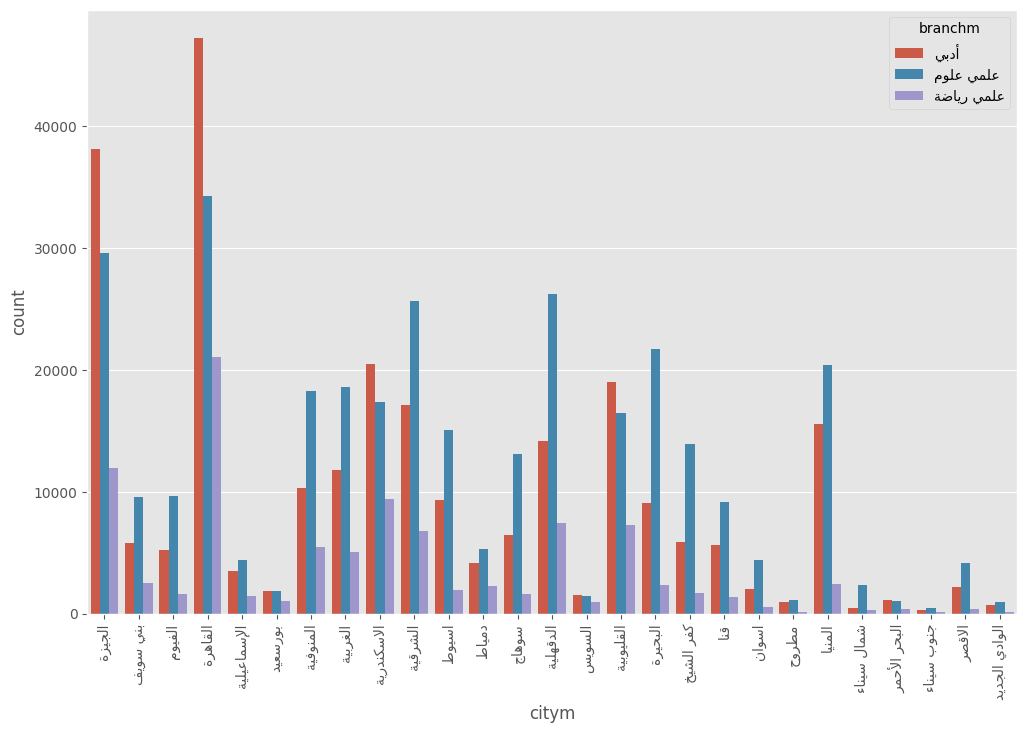

In [7]:
city_name = {}
branch_name = {}

for i in df['city'].unique():
    city_name[i] = (get_display( arabic_reshaper.reshape(i)))
city_name
    
for i in df['branch'].unique():
    branch_name[i] =  (get_display( arabic_reshaper.reshape(i)))
branch_name


    
df['citym']   = df['city'].map(city_name)
df['branchm'] = df['branch'].map(branch_name)

plt.figure(figsize=(12,8),dpi=100)
sns.countplot(data =df,x = 'citym',hue ='branchm')
plt.xticks(rotation=90)
plt.show()


In [8]:
df['status']

0             ناجح
1             ناجح
2             ناجح
3             ناجح
4         دور ثاني
            ...   
683282         NaN
683283         NaN
683284         NaN
683285         NaN
683286         NaN
Name: status, Length: 683287, dtype: object

In [9]:
df['status']  = df['status'].astype('str')


In [10]:
reshapedStatus = {}

for stat in df['status'].unique():
    reshapedStatus[stat] = (get_display( arabic_reshaper.reshape(stat)))
reshapedStatus

df['statusm']   = df['status'].map(reshapedStatus)

<Figure size 3000x1200 with 0 Axes>

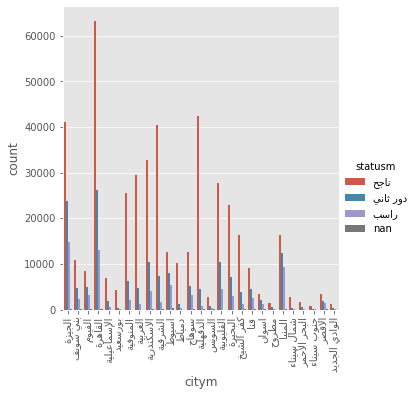

In [11]:
plt.figure(figsize=(30,12),dpi=100)
sns.catplot(x="citym",data=df,kind="count",hue="statusm")
plt.xticks(rotation=90)
plt.show()

### Let's Check Every subject grade

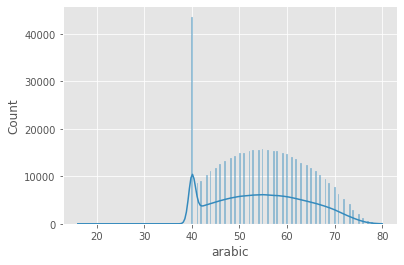

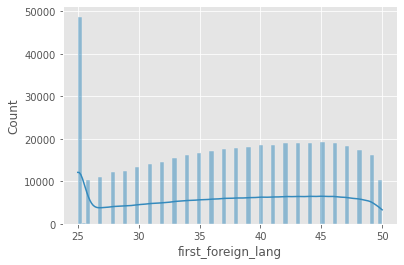

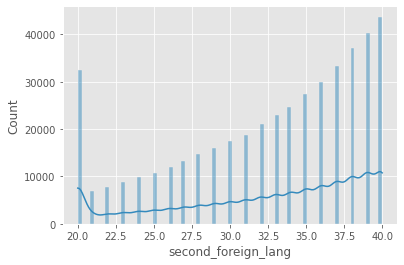

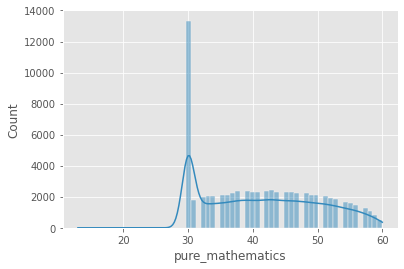

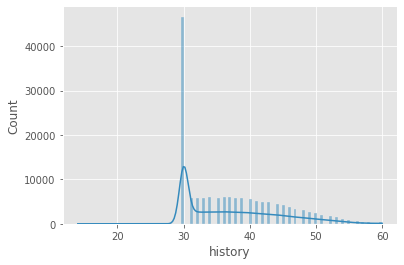

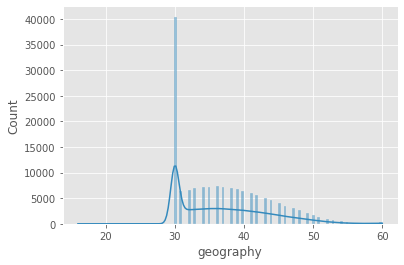

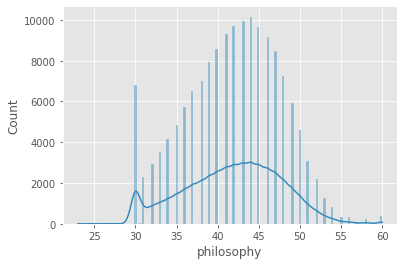

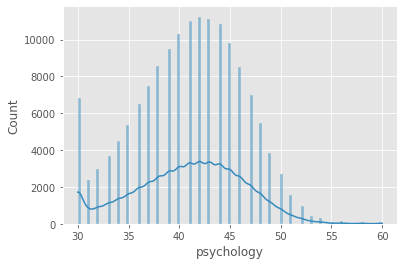

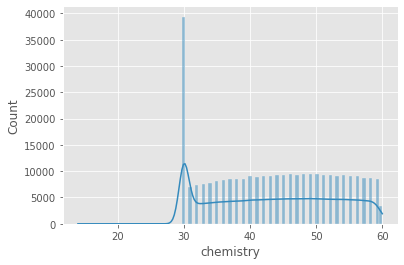

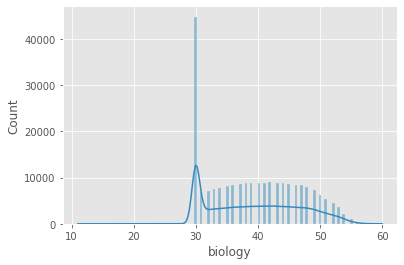

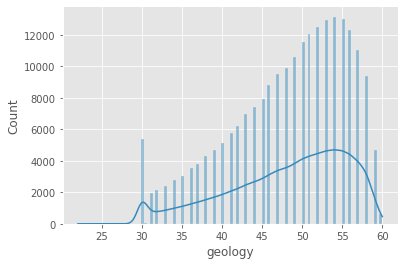

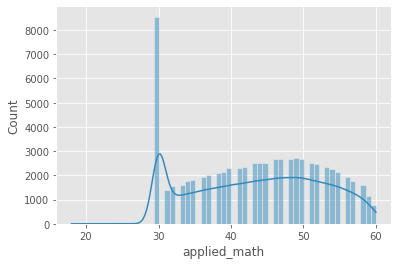

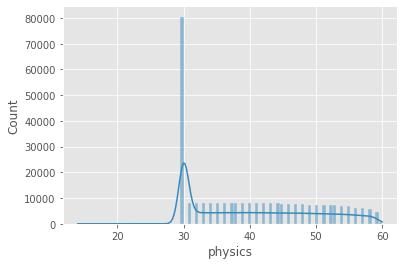

In [12]:
subjects = ['arabic','first_foreign_lang','second_foreign_lang','pure_mathematics','history','geography','philosophy','psychology','chemistry','biology','geology','applied_math','physics']
dfsuccess = df[df['status'] =='ناجح']

for sub in subjects:
    sns.histplot(data = dfsuccess, x = sub, kde = True)
    plt.show()


In [13]:
df.describe()


,desk_no,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,...,psychology_2nd,chemistry_2nd,biology_2nd,geology_2nd,applied_math_2nd,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd
count,683287.000000,682348.000000,678556.000000,677239.000000,676658.000000,96729.000000,258155.000000,258427.000000,258334.000000,258297.000000,...,72836.000000,80510.000000,63585.000000,63628.000000,17107.000000,80430.000000,153833.000000,120938.000000,120966.000000,120631.000000
mean,515723.735325,63.135943,50.062461,32.910044,29.050685,37.210867,32.774366,33.131060,38.104295,37.719668,...,35.484843,31.872165,32.003539,36.420719,32.126147,30.866959,229.369485,17.900085,16.945150,27.329492
std,242736.831593,14.879646,11.531806,10.209850,8.289507,11.568325,9.712496,8.380363,8.076330,7.164803,...,5.195645,5.549049,4.700100,6.968903,5.997748,5.506799,23.097979,2.772456,2.941489,3.713741
min,105410.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,6.000000,0.000000
25%,313296.500000,52.930000,40.000000,25.000000,22.000000,30.000000,30.000000,30.000000,32.000000,33.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,214.000000,16.000000,14.000000,25.000000
50%,505665.000000,62.680000,49.000000,33.000000,30.000000,37.000000,30.000000,31.000000,39.000000,38.000000,...,35.000000,30.000000,30.000000,35.000000,30.000000,30.000000,226.000000,18.000000,17.000000,25.000000
75%,719948.500000,73.660000,59.000000,41.000000,36.000000,46.000000,39.000000,38.000000,44.000000,43.000000,...,39.000000,31.000000,32.000000,41.000000,33.000000,30.000000,241.000000,20.000000,19.000000,29.000000
max,937412.000000,99.270000,80.000000,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,60.000000,...,60.000000,60.000000,60.000000,60.000000,59.000000,60.000000,392.000000,25.000000,25.000000,50.000000


In [14]:
numericalColumns = df.drop(['school_name','administration','city','branch','status'],axis= 1)


In [15]:
df['dfWithDropedNUllStatus'] = df['status'].dropna(inplace=True)
df['dfWithDropedNUllStatus']

0         None
1         None
2         None
3         None
4         None
          ... 
683282    None
683283    None
683284    None
683285    None
683286    None
Name: dfWithDropedNUllStatus, Length: 683287, dtype: object

In [16]:
CountOfStatus = df[['status']].value_counts()
CountOfStatus

status  
ناجح        450945
دور ثاني    154940
راسب         76463
nan            939
dtype: int64

In [17]:
df1 = df.dropna(subset=['status'],inplace = True)


In [18]:
CountOfStatus = df[['status']].value_counts()
CountOfStatus

status  
ناجح        450945
دور ثاني    154940
راسب         76463
nan            939
dtype: int64

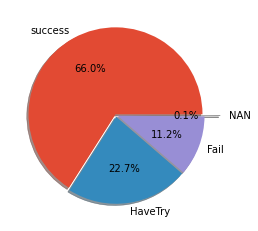

In [19]:
Status = ['success',"HaveTry",'Fail','NAN']
labels = list(Status)

plt.pie(CountOfStatus,explode=[0.01,0.02,0.02,0.2],labels=labels,autopct='%1.1f%%', shadow=True);

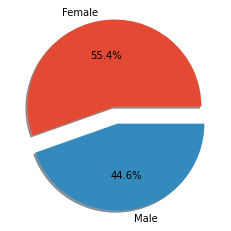

In [20]:
Gender = df['gender'].value_counts()
Gender
plt.pie(Gender,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

In [40]:
Gender

F    378095
M    304405
Name: gender, dtype: int64

> **Let's check gender of each branch**


In [45]:
MAthBranch = df[df['branch']=="علمي رياضة"]



In [46]:
ScienceBranch = df[df['branch']== 'علمي علوم']
ScienceBranch.head()

LiteraryBranch = df[df['branch']=='أدبي']
LiteraryBranch.head()

,desk_no,school_name,administration,city,branch,Percentage,status,arabic,first_foreign_lang,second_foreign_lang,...,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge,citym,branchm,statusm,dfWithDropedNUllStatus
0,105410,الاورمان الرسمية لغات بنين,الدقى,الجيزة,أدبي,87.80,ناجح,61.0,27.0,34.0,...,NaN,NaN,NaN,NaN,NaN,left_only,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﺢﺟﺎﻧ,None
2,105413,هضبة الاهرام ث التجريبية لغات بنين,الهرم,الجيزة,أدبي,83.41,ناجح,70.0,38.0,NaN,...,NaN,NaN,NaN,NaN,NaN,left_only,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﺢﺟﺎﻧ,None
3,105415,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,أدبي,53.17,ناجح,57.0,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,left_only,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﺢﺟﺎﻧ,None
5,105417,الحى العاشر الرسمية لغات بنات,أكتوبر,الجيزة,أدبي,93.66,ناجح,69.0,45.0,36.0,...,NaN,NaN,NaN,NaN,NaN,left_only,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﺢﺟﺎﻧ,None
6,105418,الحى الخامس الرسمية المتميزة لغات بنين,أكتوبر,الجيزة,أدبي,79.02,ناجح,63.0,48.0,NaN,...,NaN,NaN,NaN,NaN,NaN,left_only,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﺢﺟﺎﻧ,None


In [47]:
MAthBranch[['gender']].value_counts()

gender
M         70165
F         27441
dtype: int64

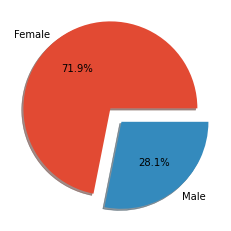

In [48]:
math = MAthBranch['gender'].value_counts()
plt.pie(math,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

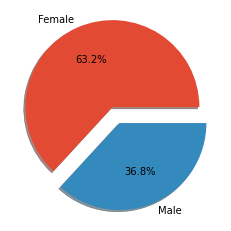

In [49]:
science = ScienceBranch['gender'].value_counts()
plt.pie(science,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

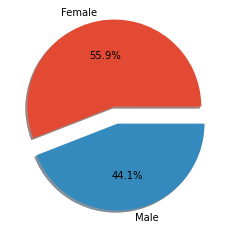

In [50]:
lit = LiteraryBranch['gender'].value_counts()
plt.pie(lit,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

>> **what is the name of the schoole have good grades **

In [27]:
schoolNameWithTotal = df[['desk_no','school_name','total','administration','city','branch']]
schoolNameWithTotal.set_index('desk_no')

,school_name,total,administration,city,branch
desk_no,,,,,
105410,الاورمان الرسمية لغات بنين,360.0,الدقى,الجيزة,أدبي
105412,جمال عبد الناصرالرسمية لغات بنات,235.0,الدقى,الجيزة,علمي علوم
105413,هضبة الاهرام ث التجريبية لغات بنين,342.0,الهرم,الجيزة,أدبي
105415,التحرير الرسمية لغات بنين,218.0,أكتوبر,الجيزة,أدبي
105416,التحرير الرسمية لغات بنين,211.0,أكتوبر,الجيزة,علمي رياضة
...,...,...,...,...,...
930793,ماهر سيد حمدان الثانوية المشتركة,NaN,ابنوب,اسيوط,علمي علوم
931142,اولادالياس الثانويه المشتركة,NaN,صدفا,اسيوط,علمي علوم
931800,الواسطى الثانوية المشتركة,NaN,الفتح,اسيوط,علمي علوم


In [28]:
groupedSchooles = df.groupby(['school_name','city','branch','administration'])['total'].agg([max,min,np.mean])
groupedSchooles.sample(10)

,,,,max,min,mean
school_name,city,branch,administration,,,
الرضوى الحديثة ث خ لغات بنين,الجيزة,علمي رياضة,أكتوبر,373.0,200.0,256.181818
النموذجيه الرسمية للصداقة المصريه الصينية بنين,الجيزة,علمي علوم,أكتوبر,369.0,215.0,291.444444
الثورة الثانوية بنين,الاسكندرية,علمي علوم,العامرية,359.0,146.0,254.590909
السواحل الرياضية الثانوية,الاسكندرية,علمي رياضة,الجمرك,299.0,186.0,244.300000
ام المؤمنين الخاصه لغات بنات,الجيزة,علمي علوم,أكتوبر,377.0,208.0,290.875000
فصول السماعنة الثانويه المشتركه,الشرقية,علمي رياضة,فاقوس,285.0,171.0,254.411765
خدمات حمزه بن عبد المطلب الثانوية بنات,الجيزة,علمي علوم,بولاق الدكرور,214.0,95.0,159.224138
منازل لغات إدارة شرق مدينة نصر,القاهرة,أدبي,شرق مدينة نصر,267.0,176.0,199.100000
الابداع خ لغات بنين (النيل كنجرو سابقا),الجيزة,علمي رياضة,اوسيم,366.0,186.0,278.857143


In [29]:
groupedSchooles.sort_values(by = ['max'],ascending= False)[:20]

,,,,max,min,mean
school_name,city,branch,administration,,,
الشهيد العقيد أ . ح / محمد فاروق عبدالقادر سليم الثانوية بنين,الشرقية,علمي رياضة,كفر صقر,407.0,276.0,345.210526
المصرية الانجليزية لغات,الشرقية,أدبي,شرق الزقازيق,407.0,336.0,362.666667
الاورمان ع ث بنات,الجيزة,علمي رياضة,العجوزة,406.0,151.0,266.260274
قطور الثانوية المشتركة,الغربية,علمي رياضة,قطور,405.0,213.0,313.627907
السادات الثانوية بنين بالمحلة,الغربية,علمي رياضة,شرق المحلة,405.0,207.0,336.430108
رواد المستقبل ثانوى خاص لغات,القاهرة,علمي رياضة,الخليفة,404.0,234.0,320.750000
ناصر الثانويه بنين,البحيرة,علمي رياضة,كوم حمادة,404.0,216.0,308.772727
فضل الحديثة ث خ بنات,الجيزة,علمي رياضة,الهرم,404.0,152.0,292.444444
شبين الكوم الرسمية المتميزة والمتكاملة للغات,المنوفية,علمي رياضة,شبين الكوم,404.0,207.0,311.911765


In [30]:
groupedSchooles.sort_values(by = ['max'],ascending= True)[:30]

,,,,max,min,mean
school_name,city,branch,administration,,,
عمر بن الخطاب الثانوية الرسميه لغات,القاهرة,علمي رياضة,التبين,0.0,0.0,0.000000
الفا الخاصة لغات,القليوبية,علمي علوم,العبــــور,44.0,44.0,44.000000
عيسوى فايد الثانويه المشتركه,الغربية,علمي رياضة,بسيون,54.0,54.0,54.000000
منازل ابناؤنا فى الخارج إدارة المنيا,المنيا,علمي علوم,المنيا,79.0,79.0,79.000000
بنى الدلنجات الثانويه الرسمية لغات,البحيرة,علمي رياضة,الدلنجات,84.0,84.0,84.000000
فصول ملحقه الدعوه الاسلاميه لغات بنين,بني سويف,علمي رياضة,بنى سويف,93.0,93.0,93.000000
منازل إدارة مدينةالأقصر,الاقصر,علمي رياضة,مدينةالأقصر,93.0,93.0,93.000000
منازل لغات إدارة شمال السويس,السويس,علمي رياضة,شمال السويس,95.0,95.0,95.000000
خدمات الباجور الثانوية المطورة بنات,المنوفية,علمي علوم,الباجور,101.0,101.0,101.000000


<AxesSubplot:xlabel='arabic', ylabel='statusm'>

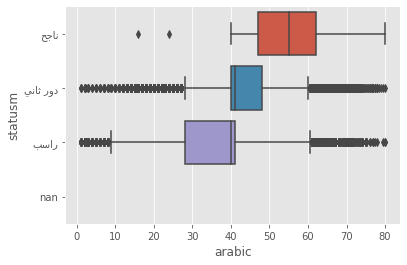

In [31]:
sns.boxplot(data=df, x="arabic", y="statusm")


<AxesSubplot:xlabel='history', ylabel='statusm'>

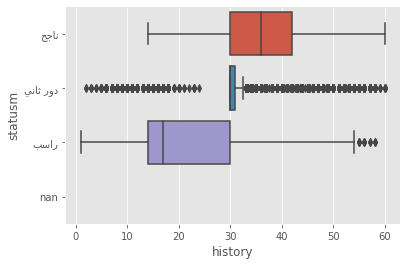

In [32]:
sns.boxplot(data=df, x="history", y="statusm")


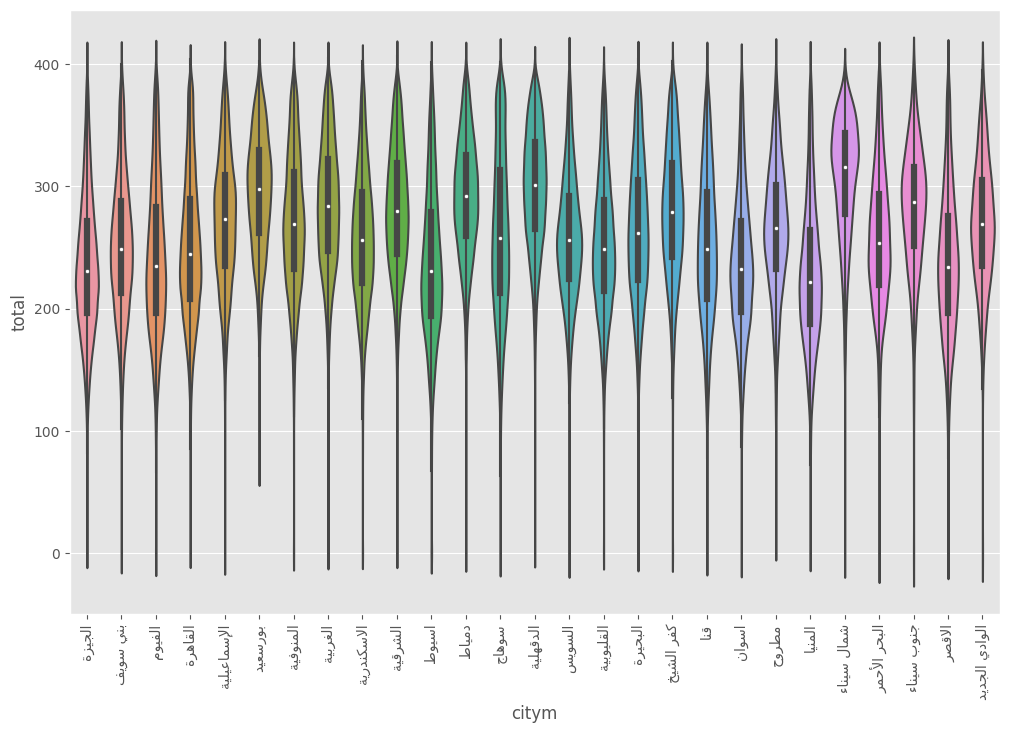

In [33]:
plt.figure(figsize=(12,8),dpi=100)

sns.violinplot(y="total",x="citym",data=df);
plt.xticks(rotation=90);
plt.show()

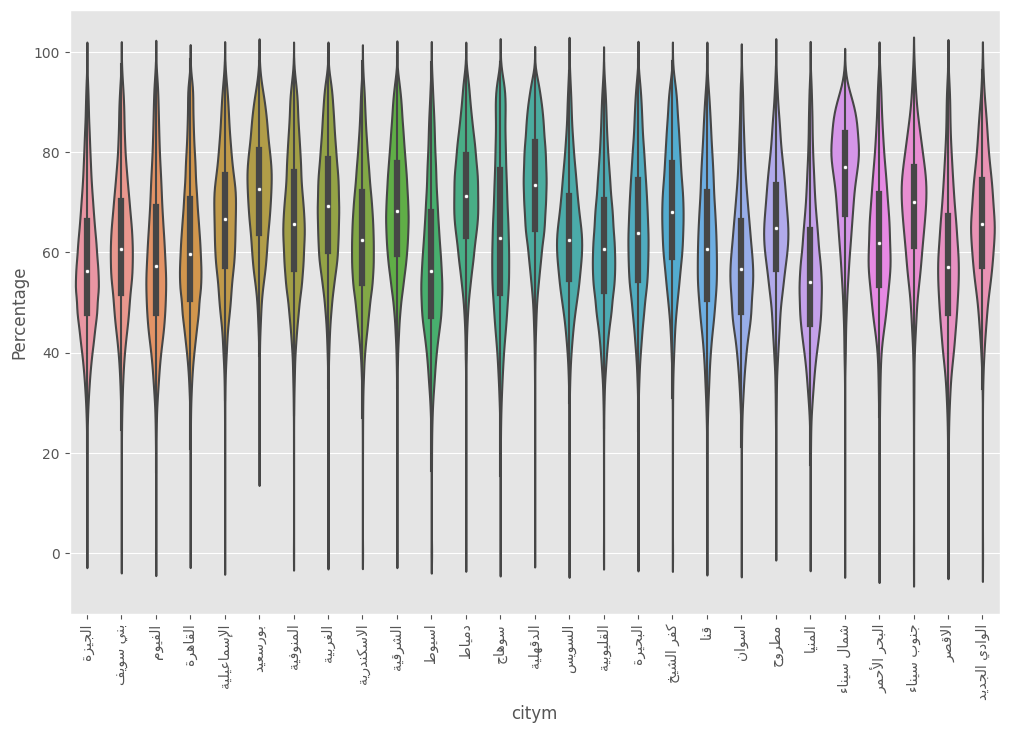

In [34]:
plt.figure(figsize=(12,8),dpi=100)

sns.violinplot(y="Percentage",x="citym",data=df);
plt.xticks(rotation=90);
plt.show()

In [58]:
SecondTry = df[df['status']=='دور ثاني']

In [59]:
SecondTry.head()

,desk_no,school_name,administration,city,branch,Percentage,status,arabic,first_foreign_lang,second_foreign_lang,...,physics_2nd,total_2nd,religion_2nd,national_education_2nd,economics_statistics_2nd,_merge,citym,branchm,statusm,dfWithDropedNUllStatus
4,105416,التحرير الرسمية لغات بنين,أكتوبر,الجيزة,علمي رياضة,51.46,دور ثاني,56.0,25.0,6.0,...,31.0,225.0,18.0,20.0,31.0,both,ﺓﺰﻴﺠﻟﺍ,ﺔﺿﺎﻳﺭ ﻲﻤﻠﻋ,ﻲﻧﺎﺛ ﺭﻭﺩ,None
40,105463,العجوزة ث بنات,العجوزة,الجيزة,أدبي,70.98,دور ثاني,76.0,26.0,20.0,...,NaN,307.0,16.0,12.5,28.5,both,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﻲﻧﺎﺛ ﺭﻭﺩ,None
53,105477,د/محمود عمر ث بنات,الهرم,الجيزة,أدبي,42.32,دور ثاني,40.0,25.5,NaN,...,NaN,187.5,16.0,12.5,33.0,both,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﻲﻧﺎﺛ ﺭﻭﺩ,None
54,105478,6 اكتوبر الحى السادس ث بنين,أكتوبر,الجيزة,أدبي,51.95,دور ثاني,42.0,33.0,20.0,...,NaN,229.0,21.0,12.5,25.0,both,ﺓﺰﻴﺠﻟﺍ,ﻲﺑﺩﺃ,ﻲﻧﺎﺛ ﺭﻭﺩ,None
61,105485,6 اكتوبر الحى السادس ث بنين,أكتوبر,الجيزة,علمي علوم,54.15,دور ثاني,73.0,44.0,6.0,...,30.0,258.0,18.0,25.0,28.0,both,ﺓﺰﻴﺠﻟﺍ,ﻡﻮﻠﻋ ﻲﻤﻠﻋ,ﻲﻧﺎﺛ ﺭﻭﺩ,None


In [61]:
SecondTry.columns

Index(['desk_no', 'school_name', 'administration', 'city', 'branch',
       'Percentage', 'status', 'arabic', 'first_foreign_lang',
       'second_foreign_lang', 'pure_mathematics', 'history', 'geography',
       'philosophy', 'psychology', 'chemistry', 'biology', 'geology',
       'applied_math', 'physics', 'total', 'religion', 'national_education',
       'economics_statistics', 'gender', 'Percentage_2nd', 'status_2nd',
       'arabic_2nd', 'first_foreign_lang_2nd', 'second_foreign_lang_2nd',
       'pure_mathematics_2nd', 'history_2nd', 'geography_2nd',
       'philosophy_2nd', 'psychology_2nd', 'chemistry_2nd', 'biology_2nd',
       'geology_2nd', 'applied_math_2nd', 'physics_2nd', 'total_2nd',
       'religion_2nd', 'national_education_2nd', 'economics_statistics_2nd',
       '_merge', 'citym', 'branchm', 'statusm', 'dfWithDropedNUllStatus'],
      dtype='object')

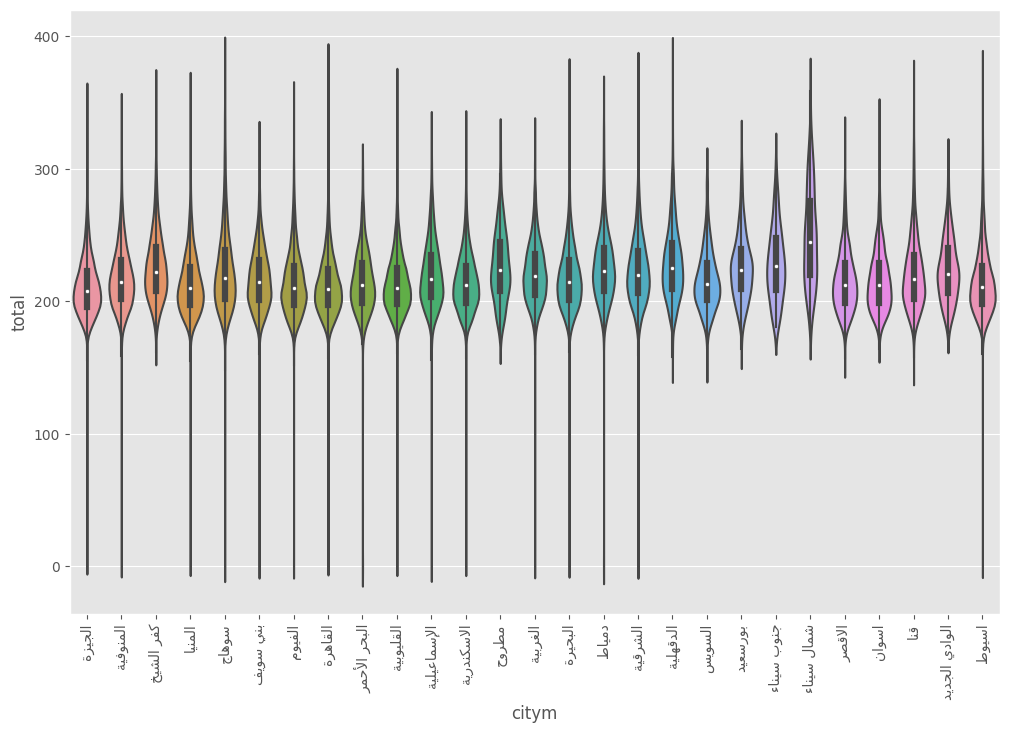

In [62]:
plt.figure(figsize=(12,8),dpi=100)

sns.violinplot(y="total",x="citym",data=SecondTry);
plt.xticks(rotation=90);
plt.show()

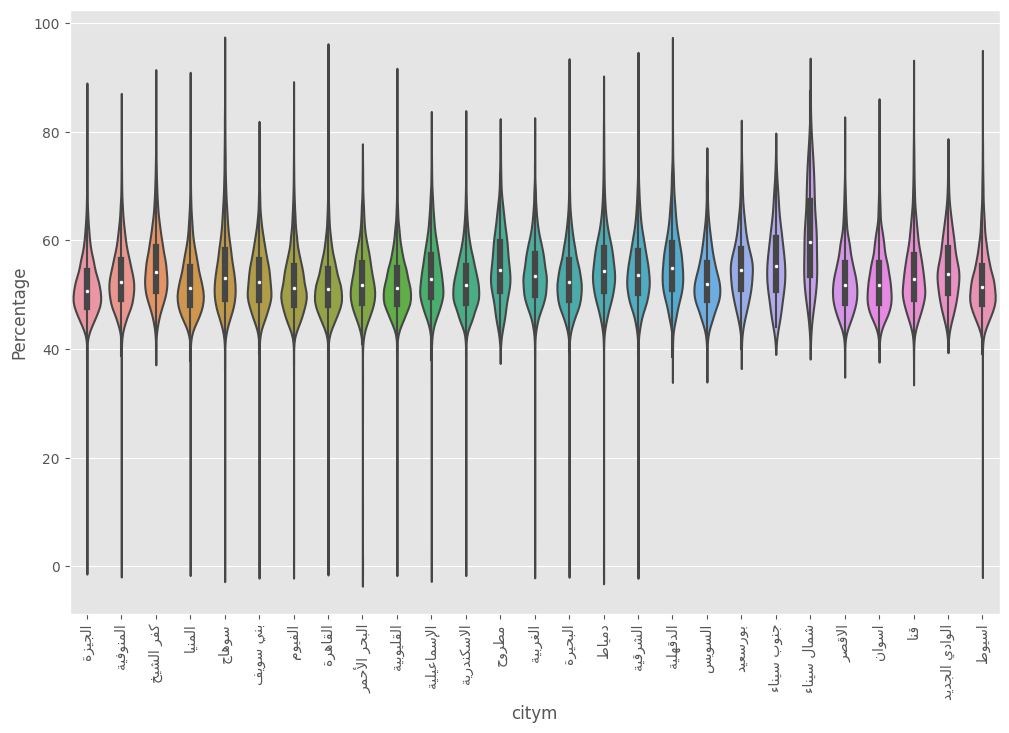

In [63]:
plt.figure(figsize=(12,8),dpi=100)

sns.violinplot(y="Percentage",x="citym",data=SecondTry);
plt.xticks(rotation=90);
plt.show()

In [70]:
MAthBranchsecnd = SecondTry[SecondTry['branch']=="علمي رياضة"]
scienceBranchsecond= SecondTry[SecondTry['branch'] == 'علمي علوم']
literBranchsecond = SecondTry[SecondTry['branch']=="أدبي"]


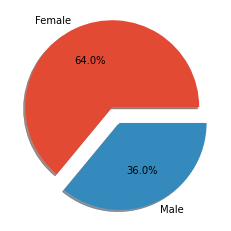

In [71]:
mathscond = MAthBranchsecnd['gender'].value_counts()
plt.pie(mathscond,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

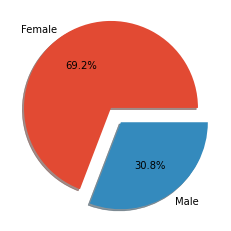

In [72]:
siencesecond = scienceBranchsecond['gender'].value_counts()
plt.pie(siencesecond,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

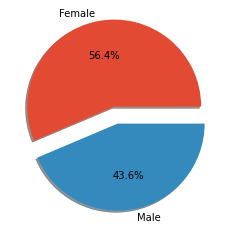

In [73]:
litersecond = literBranchsecond['gender'].value_counts()
plt.pie(litersecond,labels= ['Female','Male'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

In [80]:
SecondTryStatus = SecondTry['status_2nd'].value_counts()

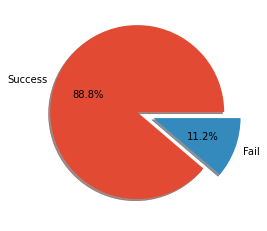

In [81]:
plt.pie(SecondTryStatus,labels= ['Success','Fail'],explode = [0.1,0.1],shadow=True,autopct='%1.1f%%');

# Conclusion

1. In the first exam القاهرة has the largest number of all branches and  جنوب سيناء
2. has the smallest number of all branches due to littel number of population in it and they not interested in education
 
>># There exist a bad distribution in grades as 
1. in arabic the garad is under 20000 student and they distributed from 40 to 70 
2. in first_foreign_lang is more good than arabic 
3. second_foreign_lang ,geology and  philosophy are the best three subjects in grades 
4. pure_mathematics  and applied math are very bad
5. history ,geography and physics are the most bad in grades

>># percentage of Results
1. we have 66% percentage of student who complete first exam and pass it
2. 11.2% Fail in it 
3. 22.7 have a second Try

>># Gender distribution
1. in math 71.9% Female and 28.1 Male 
2. in science 63.2% Female and 36.8 Male
3. in literacy 55.9% Female and 44.1% Male

>># After adding second Exam Result we have 88.8% success in all Branches 